In [29]:
import networkx as nx
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
import collections
import numpy as np
import statistics
import math

In [9]:
def get_graph(n_conn):
    clusters = pd.read_csv('../dataset/clusters.csv')
    clusters.index.name = 'cluster_id'
    entries = pd.read_csv('../dataset/cluster_conenctions.csv')
    G = nx.Graph()
    for c in clusters.iterrows():
        G.add_node(c[0], pos=(c[1]['lon'], c[1]['lat']), label=c[1]['label'], size=c[1]['size'])
    for row in entries.iterrows():
        if row[1]['entries'] > n_conn: # gathering is considered to be more than 2 people
            G.add_edge(row[1]['cluster_id0'],
                   row[1]['cluster_id1'],
                   weight=row[1]['entries'])
    return G

In [31]:
def avg_degree(G):
    degrees = sorted([d for n, d in G.degree()], reverse=True)
    avg_degree = sum(degrees)/len(degrees)
    return avg_degree

## Original graph

In [38]:
G = get_graph(n_conn = 2)

In [45]:
avg_degree(G)

10.14

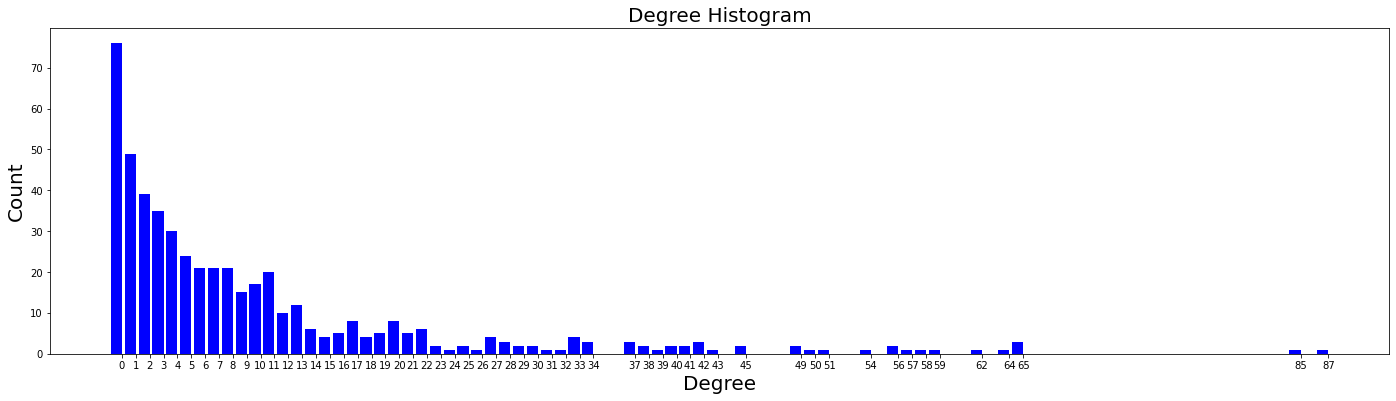

In [22]:
degrees = sorted([d for n, d in G.degree()], reverse=True)
degree_count = collections.Counter(degrees)
deg, cnt = zip(*degree_count.items())
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (24, 6))
plt.bar(deg, cnt, width=0.80, color="b")
plt.title("Degree Histogram", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xlabel("Degree", fontsize=20)
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
plt.savefig('./output/degree_distribution.png')
plt.show()

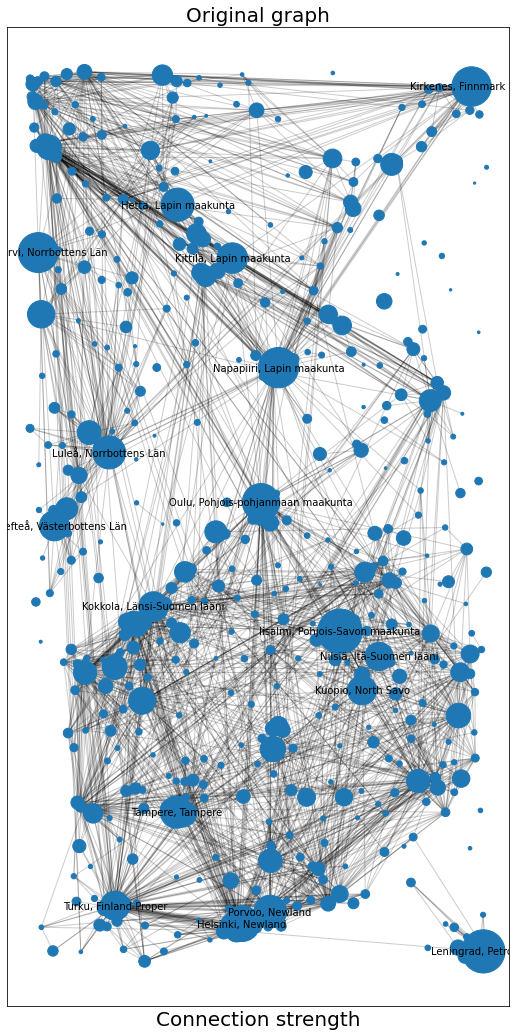

In [28]:
fig, ax = plt.subplots(figsize = (9, 18))
title = 'Original graph'
subtitle = 'Connection strength'
labels_all = nx.get_node_attributes(G, 'label')
labels = {}
for x in G.nodes():
    if nx.get_node_attributes(G, 'size')[x] >= 800:
        labels[x] = labels_all[x]
        
node_sizes = list(nx.get_node_attributes(G, 'size').values())
pos = nx.get_node_attributes(G, 'pos')

nx.draw_networkx_nodes(G, pos = pos, node_size=node_sizes)
nx.draw_networkx_edges(G, pos = pos, alpha=0.2, edge_color='#000000')
nx.draw_networkx_labels(G, pos, labels = labels, font_size=10)
plt.title(title, fontsize=20)
ax.set_xlabel(subtitle, fontsize=20)
fig.savefig('./output/' + title.replace(' ', '_') + '_' + subtitle.replace(' ', '_') + '.png')
plt.show()

## Barabási-Albert model

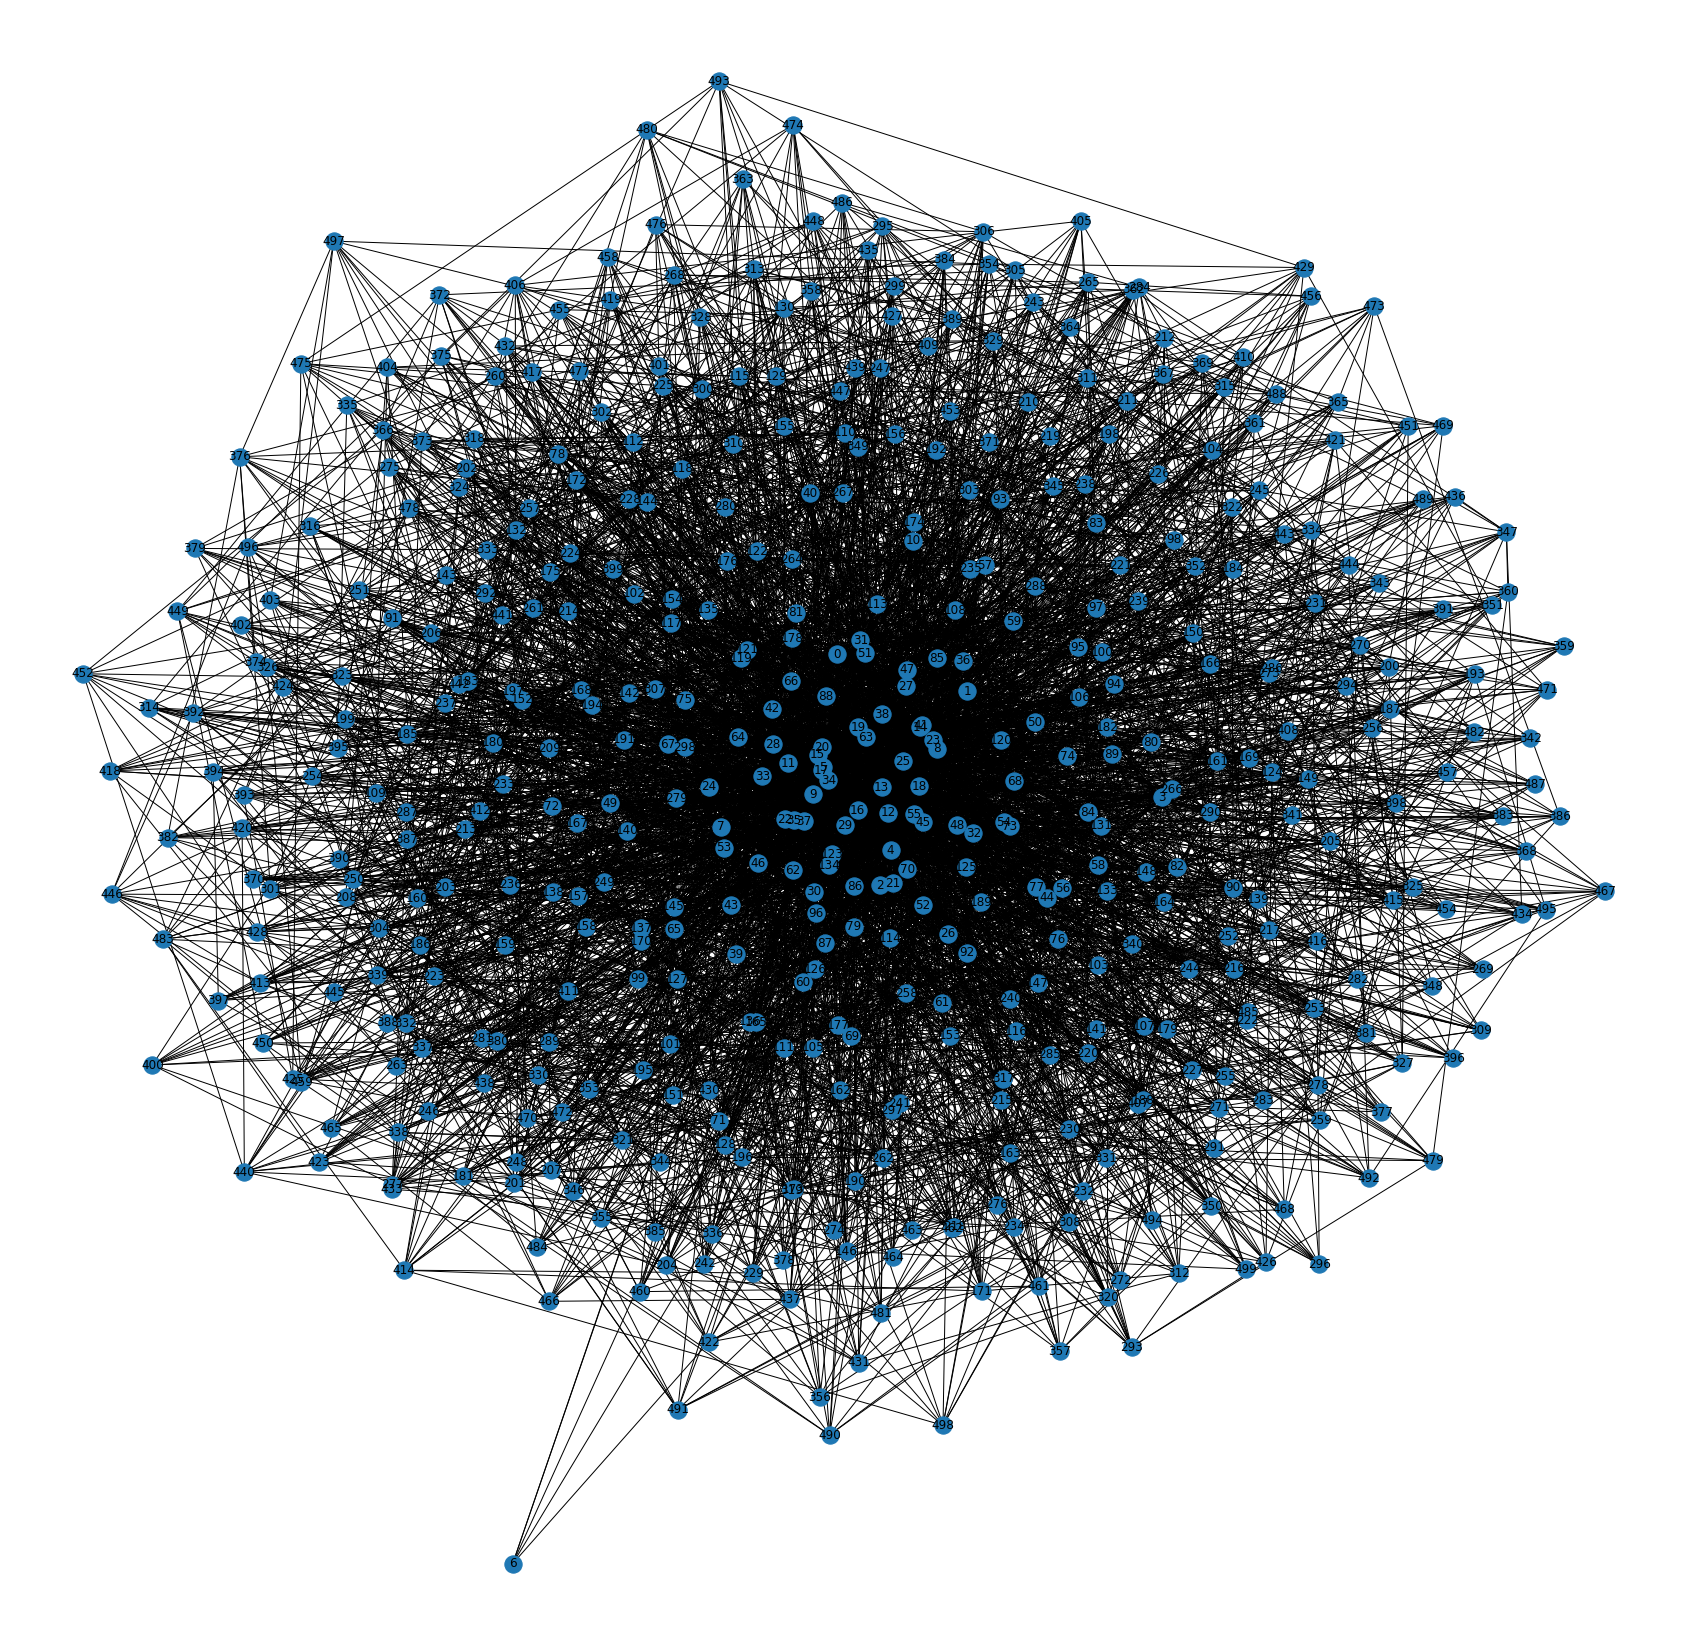

In [30]:
N = 500
m = math.ceil(avg_degree)
G = nx.barabasi_albert_graph(N, m)
fig, ax = plt.subplots(figsize = (30,30))
nx.draw(G, pos = nx.spring_layout(G), with_labels=True)
plt.show()

## Erdős-Rényi model

In [42]:
L = len(G.edges) # number of links expected
p = 2*L/(N*(N-1)) # probabiulity of connection
ER = nx.erdos_renyi_graph(N, p)

In [44]:
avg_degree(ER)

9.996

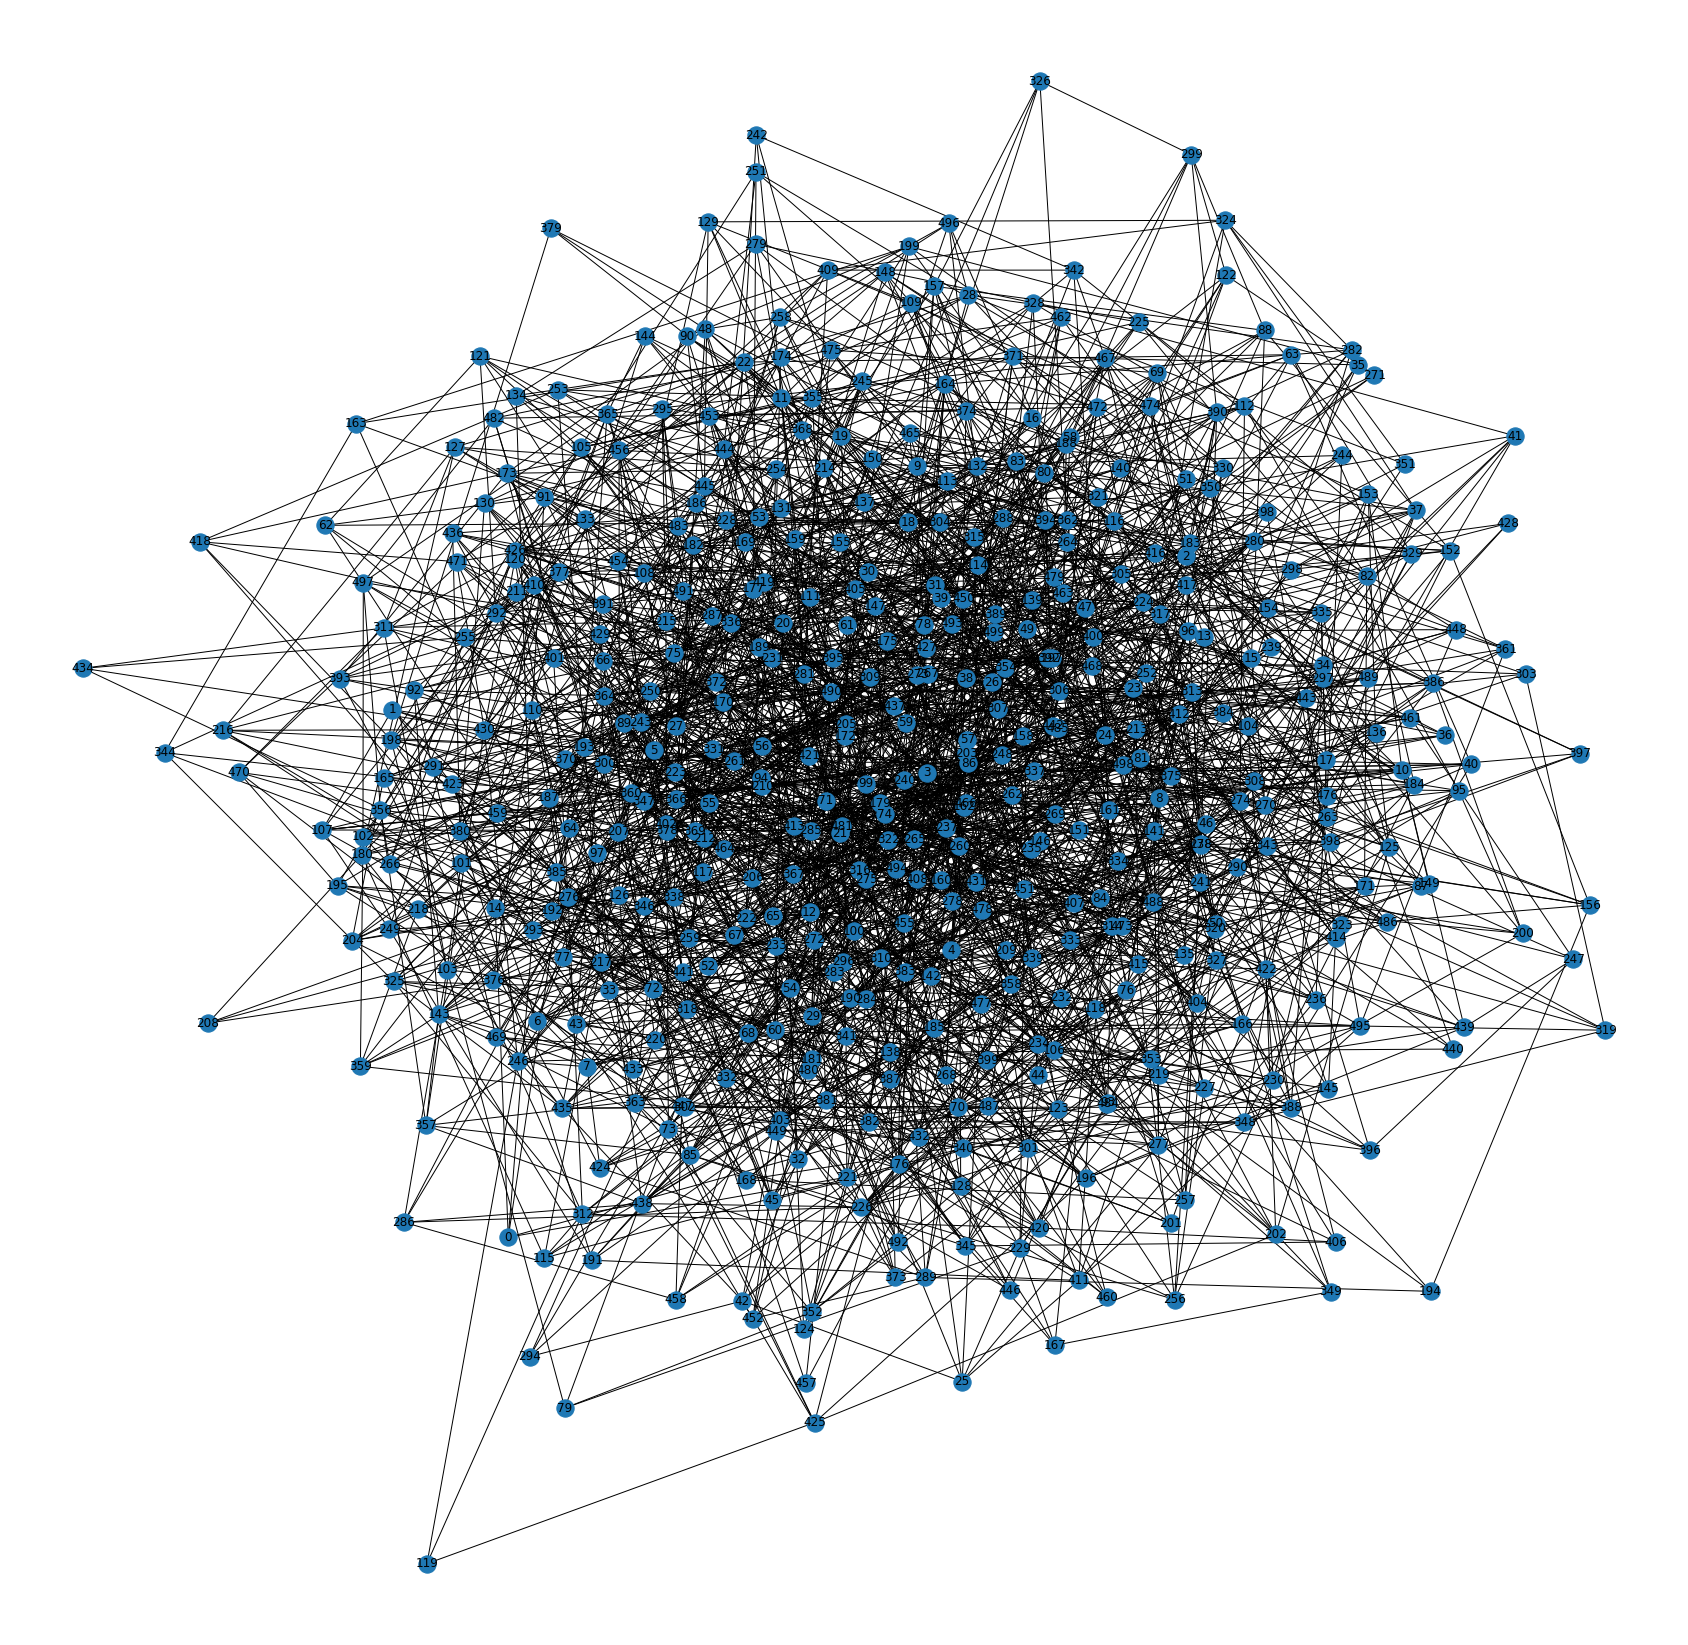

In [43]:
fig, ax = plt.subplots(figsize = (30,30))
nx.draw(ER, pos = nx.spring_layout(ER), with_labels=True)
plt.show()